<a href="https://colab.research.google.com/github/Rekha791913/assignment-diamond/blob/main/dia_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
import joblib
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import warnings
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")



In [ ]:
data = pd.read_csv('/content/diamonds (2).csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.shape

(53940, 10)

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
data.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [ ]:
data.head

<bound method NDFrame.head of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [ ]:

data.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [ ]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
data.duplicated().sum()

np.int64(146)

In [ ]:
data.value_counts()

carat  cut      color  clarity  depth  table  price  x     y     z   
0.79   Ideal    G      SI1      62.3   57.0   2898   5.90  5.85  3.66    5
0.40   Premium  F      VS1      61.4   58.0   1050   4.75  4.73  2.91    2
2.05   Premium  G      SI1      61.6   59.0   15291  8.20  8.16  5.04    2
0.60   Premium  D      SI2      62.0   57.0   1196   5.43  5.35  3.34    2
0.40   Premium  F      VS1      61.4   58.0   982    4.73  4.75  2.91    2
                                                                        ..
0.50   Ideal    E      VS1      62.2   54.0   1665   5.10  5.13  3.18    1
                                       56.0   1619   5.10  5.13  3.18    1
                                       57.0   1603   5.10  5.13  3.18    1
                                              1724   5.13  5.10  3.18    1
                       SI2      62.5   57.0   1240   5.07  5.04  3.16    1
Name: count, Length: 53794, dtype: int64

In [ ]:
data.nunique()

,0
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552
z,375


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
cat_cols = data.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [ ]:
## Handle Outliers

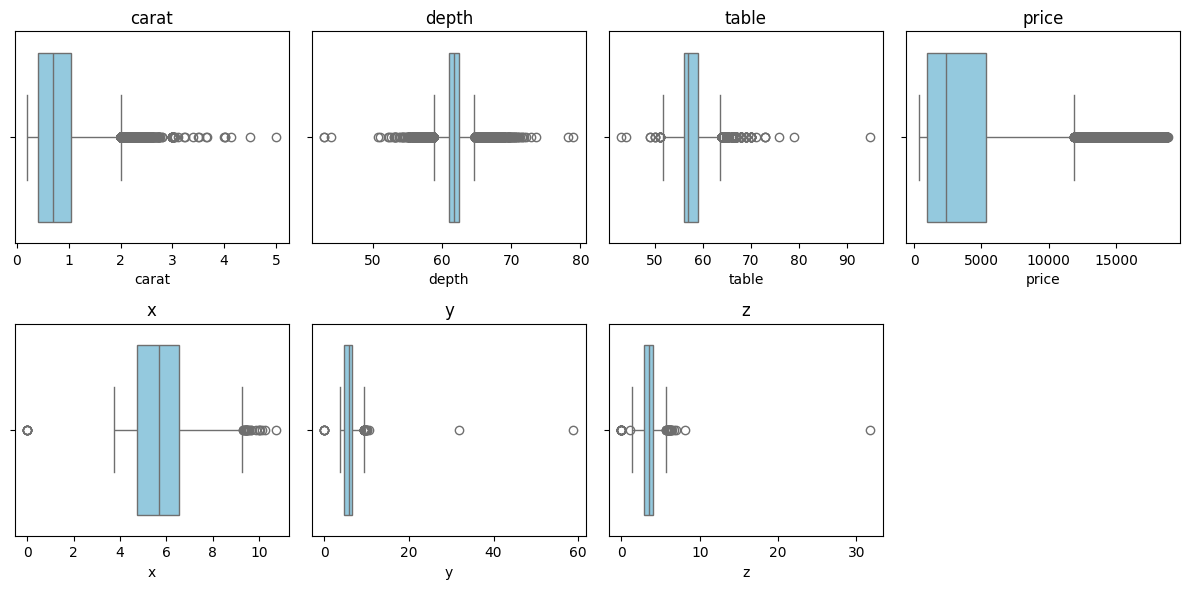

In [ ]:
# Boxplot for numeric columns
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Loop through columns and plot each as a subplot in rows
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


In [ ]:
## IQR Method

In [ ]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

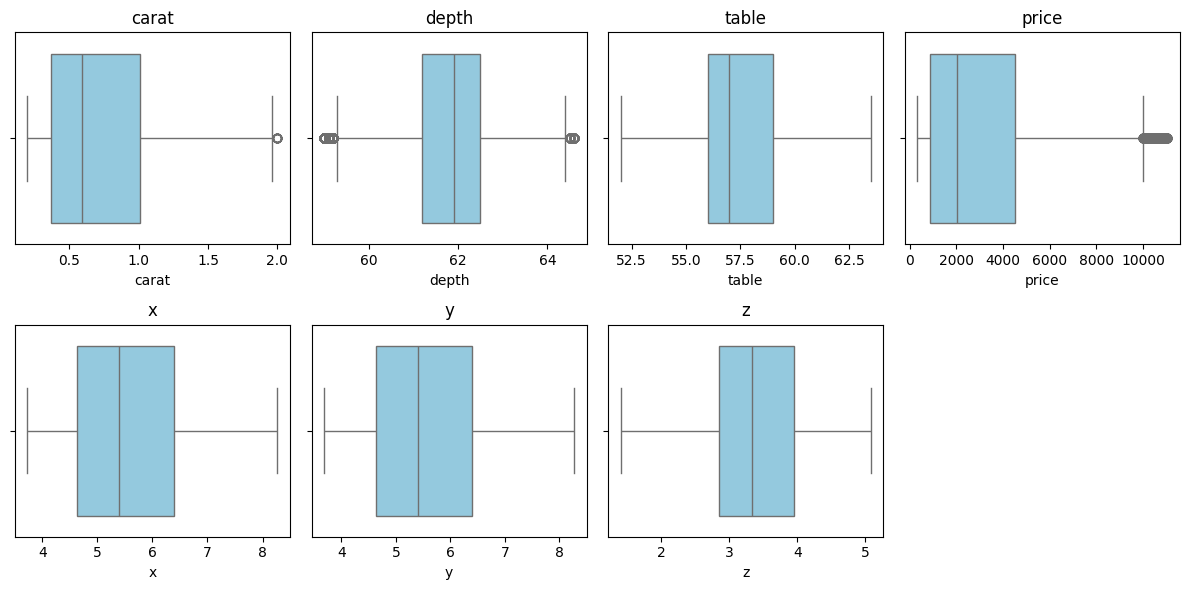

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,4, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
## Label Encoder

In [ ]:
# Create a label encoder object
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Check first few rows
print(data.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
5   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48


In [ ]:
data['cut'].unique()

array([2, 3, 1, 4, 0])

In [ ]:
data['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [ ]:
data['clarity'].unique()

array([3, 2, 5, 7, 6, 4, 0, 1])

In [ ]:
with open ('diatarget.pkl','wb')as f:
     pickle.dump(le,f)

In [ ]:
## Handling Skewness

In [ ]:
skew_cols = data[num_cols].skew().sort_values(ascending=False)
skew_cols

,0
price,1.142876
carat,0.684203
table,0.396266
x,0.253743
z,0.248923
y,0.247203
depth,-0.197123


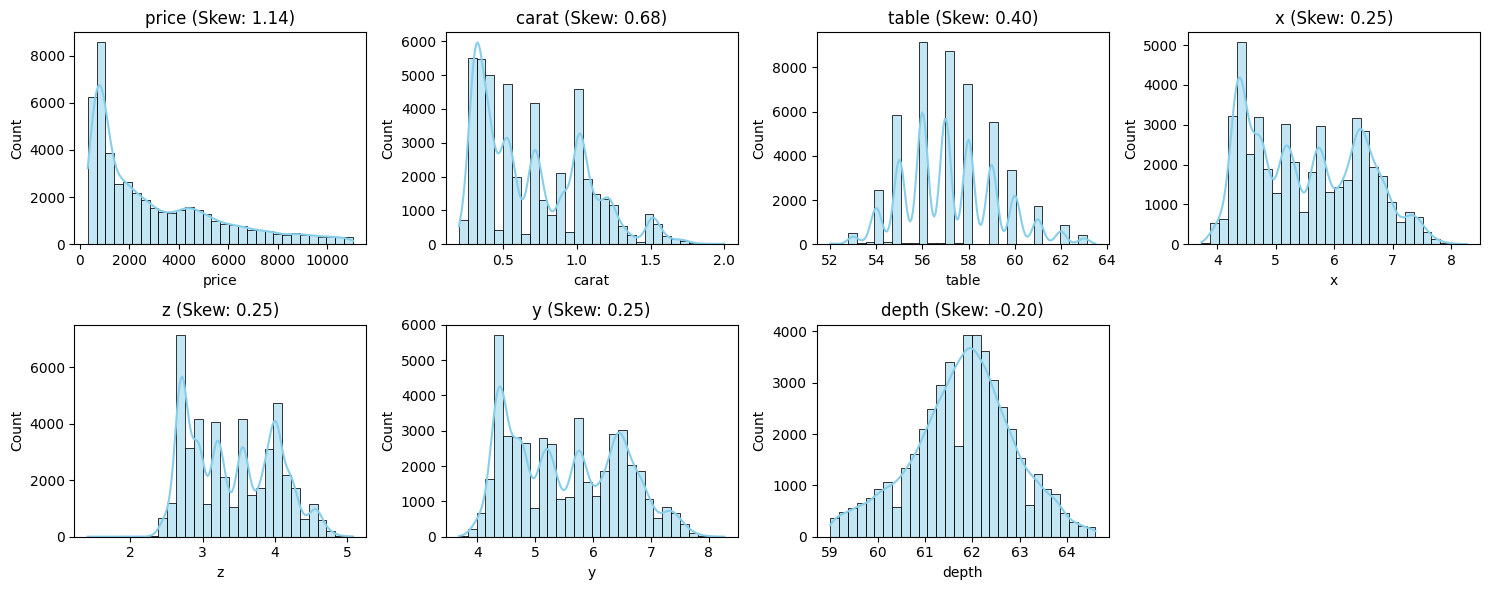

In [ ]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(skew_cols.index, 1):
    plt.subplot(2, (len(skew_cols) + 1)//2, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} (Skew: {skew_cols[col]:.2f})')

plt.tight_layout()
plt.show()

In [ ]:
## Apply Log Transformation for positive skewed columns

In [ ]:
for col in skew_cols.index:
    if abs(skew_cols[col]) > 0.5:
        data[f'{col}_log'] = np.log1p(data[col])

In [ ]:
new_num_cols = [col for col in data.columns if '_log' in col]
new_skew = data[new_num_cols].skew().sort_values(ascending=False)
print("\n Skewness after transformation:\n", new_skew)



 Skewness after transformation:
 carat_log    0.400543
price_log    0.063027
dtype: float64


In [ ]:
## Exploratory Data Analysis

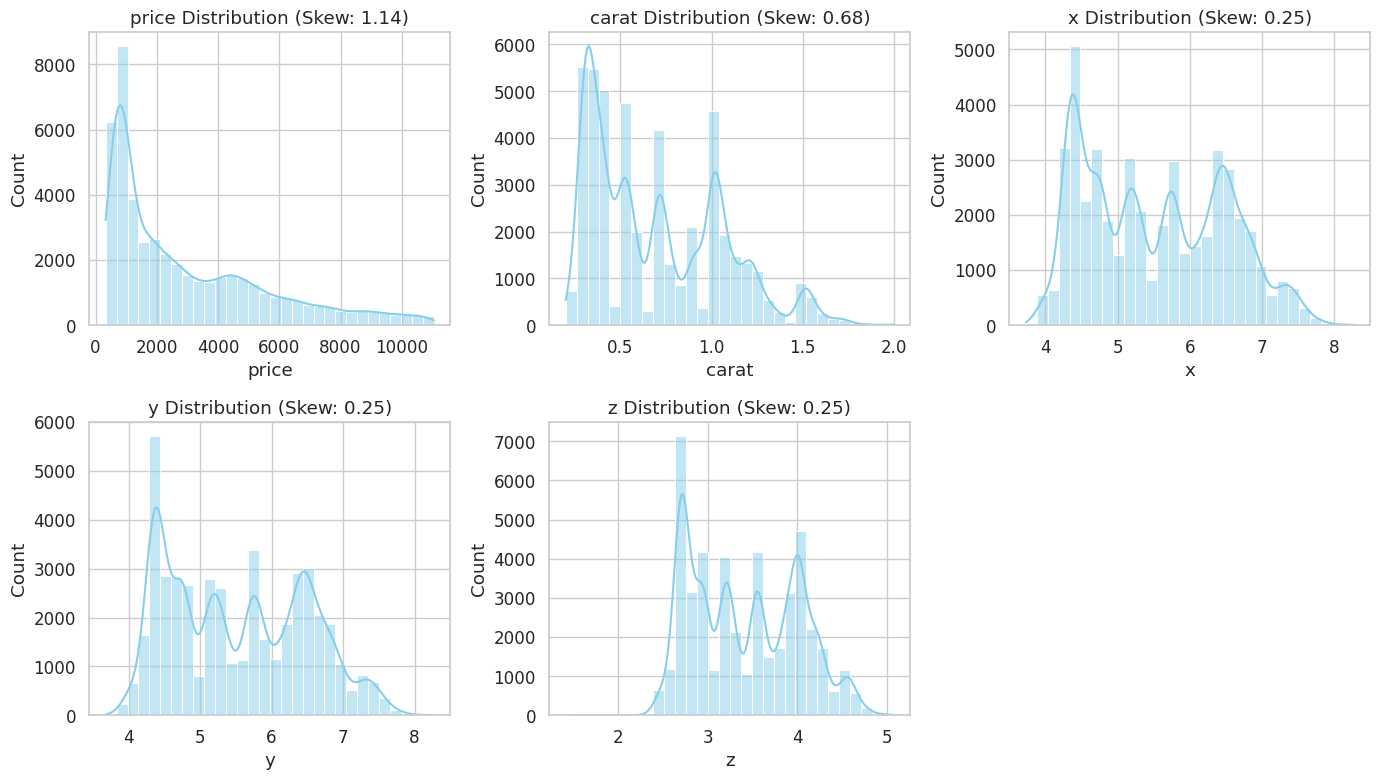

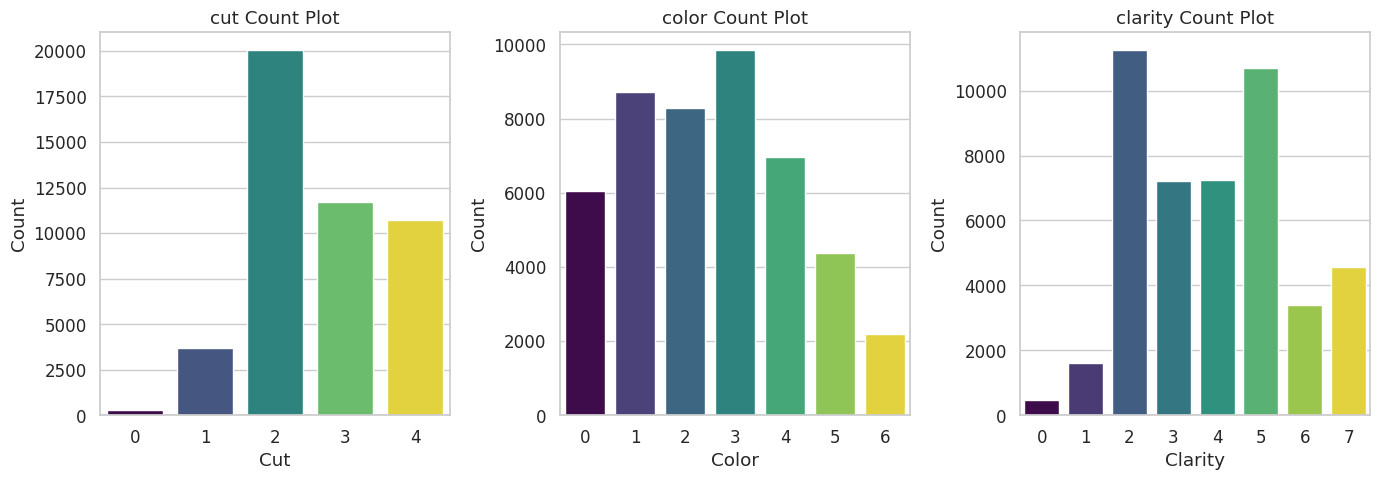

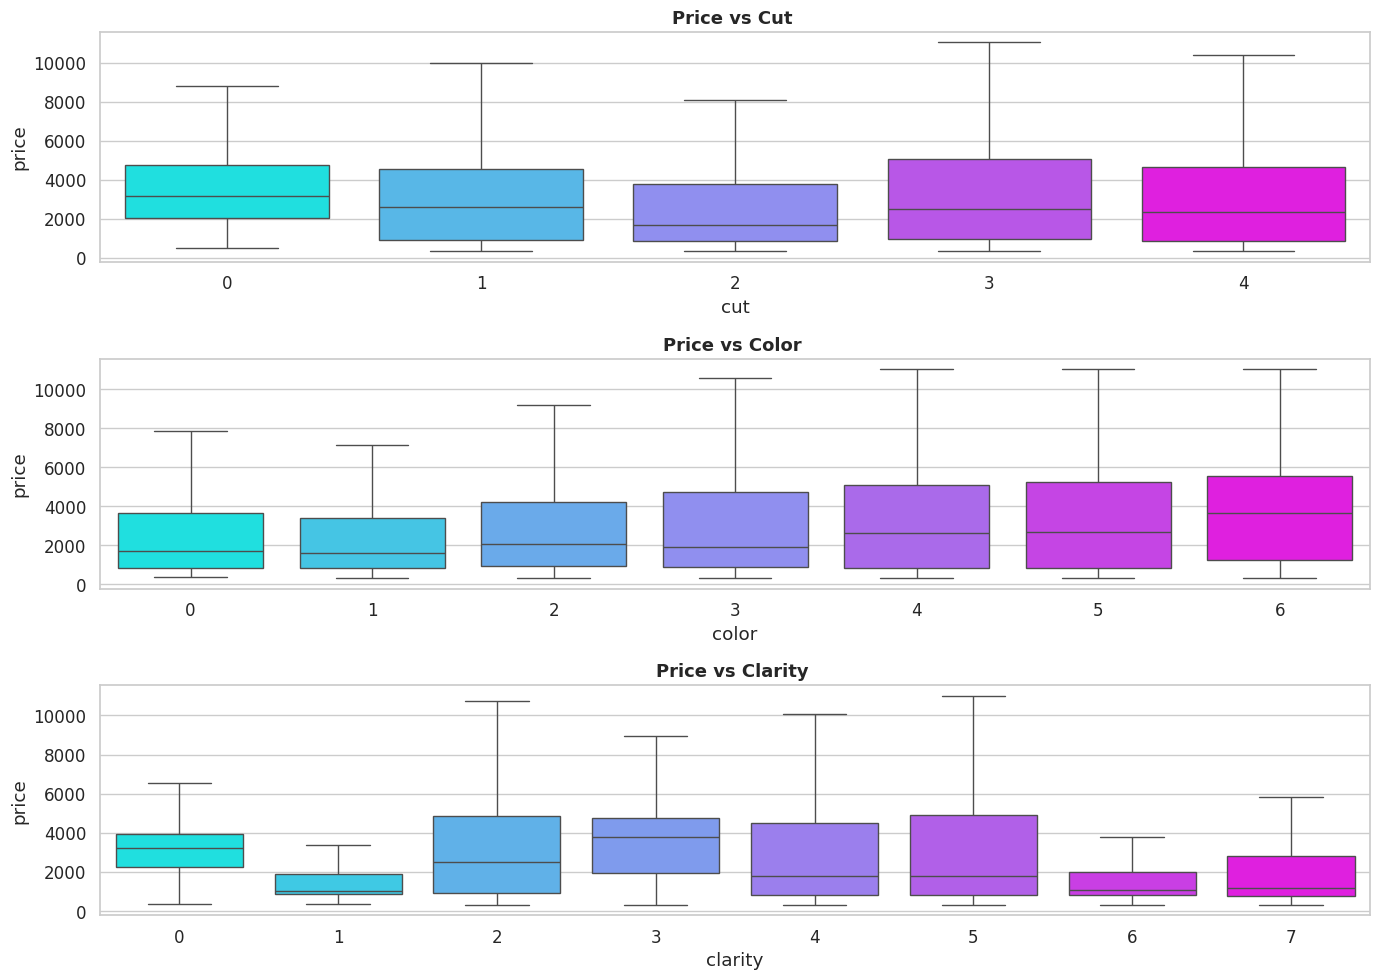

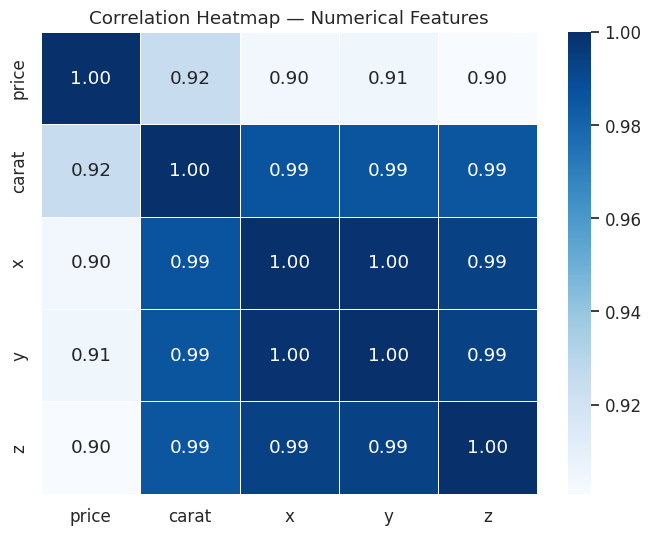

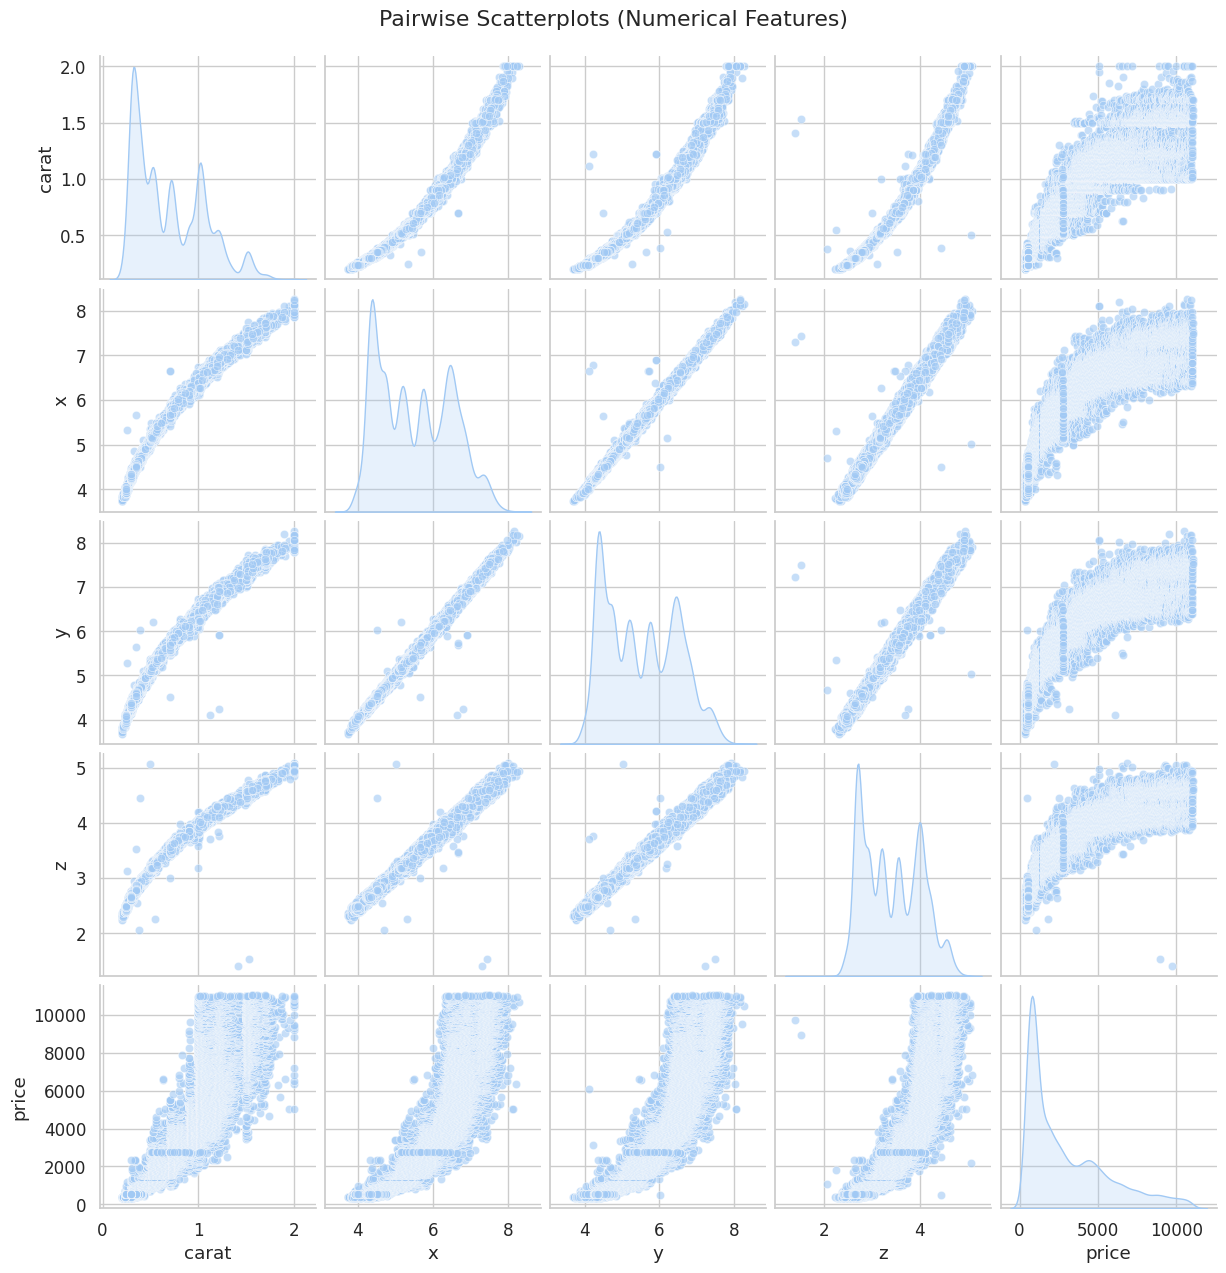

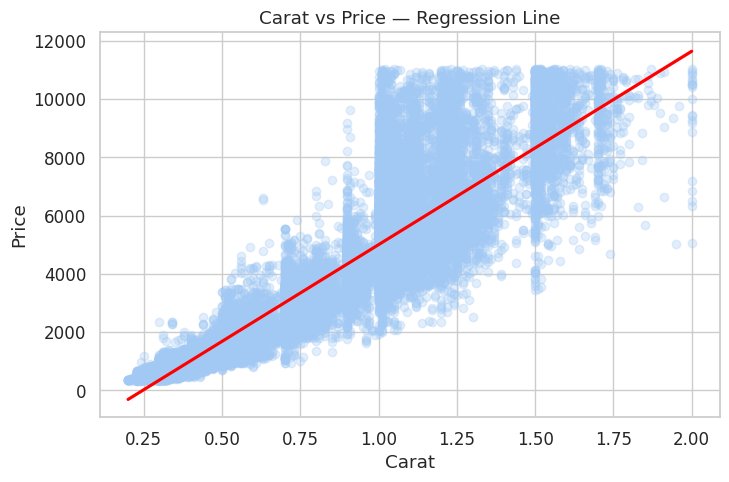

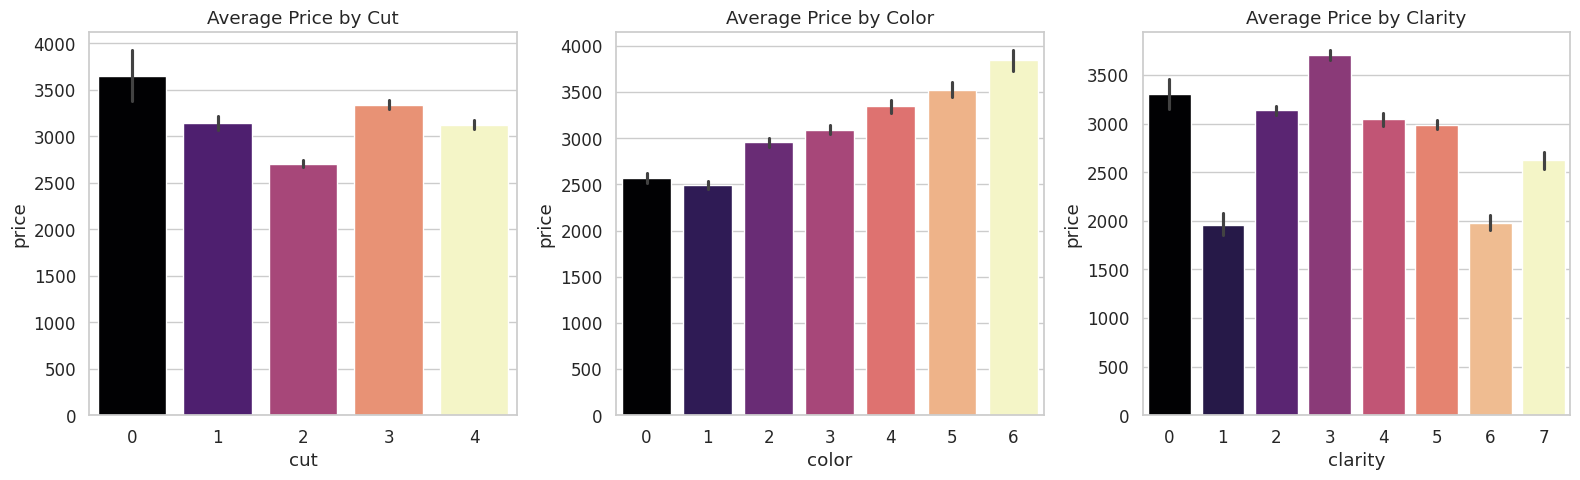

In [ ]:
# Visual style settings
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

# DISTRIBUTION PLOTS (NUMERIC COLUMNS)
num_cols = ['price', 'carat', 'x', 'y', 'z']

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution (Skew: {data[col].skew():.2f})')
plt.tight_layout()
plt.show()


#COUNT PLOTS (CATEGORICAL FEATURES)


cat_cols = ['cut', 'color', 'clarity']

plt.figure(figsize=(14, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=col,hue =col,palette='viridis',legend =False)
    plt.title(f'{col} Count Plot')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


# PRICE VARIATION WITH CATEGORICAL FEATURES (BOXPLOTS)

plt.figure(figsize=(14, 10))

# Price vs Cut
plt.subplot(3, 1, 1)
sns.boxplot(x='cut', y='price', hue='cut', data=data, palette='cool', legend=False, showfliers=False)
plt.title('Price vs Cut ', fontsize=13, fontweight='bold')

# Price vs Color
plt.subplot(3, 1, 2)
sns.boxplot(x='color', y='price', hue='color', data=data, palette='cool', legend=False, showfliers=False)
plt.title('Price vs Color ', fontsize=13, fontweight='bold')

# Price vs Clarity
plt.subplot(3, 1, 3)
sns.boxplot(x='clarity', y='price', hue='clarity', data=data, palette='cool', legend=False, showfliers=False)
plt.title('Price vs Clarity ', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


# CORRELATION HEATMAP (NUMERICAL FEATURES)

plt.figure(figsize=(8, 6))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap — Numerical Features')
plt.show()

# PAIRWISE RELATIONSHIPS (SCATTERPLOT MATRIX)


sns.pairplot(
    data,
    vars=['carat', 'x', 'y', 'z', 'price'],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Pairwise Scatterplots (Numerical Features)', y=1.02)
plt.show()


# CARAT VS PRICE (REGRESSION LINEPLOT)


plt.figure(figsize=(8, 5))
sns.regplot(
    x='carat', y='price', data=data,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Carat vs Price — Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


# AVERAGE PRICE PER CATEGORY (BAR PLOTS)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Average Price by Cut
sns.barplot(
    x='cut', y='price', hue='cut',
    data=data, estimator=np.mean,
    palette='magma', legend=False, ax=ax[0]
)
ax[0].set_title('Average Price by Cut')

# Average Price by Color
sns.barplot(
    x='color', y='price', hue='color',
    data=data, estimator=np.mean,
    palette='magma', legend=False, ax=ax[1]
)
ax[1].set_title('Average Price by Color')

# Average Price by Clarity
sns.barplot(
    x='clarity', y='price', hue='clarity',
    data=data, estimator=np.mean,
    palette='magma', legend=False, ax=ax[2]
)
ax[2].set_title('Average Price by Clarity')

plt.tight_layout()
plt.show()



In [ ]:
## Feature Engineering

In [ ]:
# --- Feature Engineering ---

# 1️⃣ Convert Price from USD → INR
USD_TO_INR = 83
data['Price_INR'] = data['price'] * USD_TO_INR

# 2️⃣ Volume (x * y * z)
data['Volume'] = data['x'] * data['y'] * data['z']

# 3️⃣ Price per Carat (price / carat)
data['Price_per_Carat'] = data['price'] / data['carat']

# 4️⃣ Dimension Ratio ((x + y) / (2 * z))
data['Dimension_Ratio'] = (data['x'] + data['y']) / (2 * data['z'])

# 5️⃣ Carat Category (based on weight)
data['Carat_Category'] = pd.cut(
    data['carat'],
    bins=[0, 0.5, 1.5, data['carat'].max()],
    labels=['Light', 'Medium', 'Heavy']
)

# 6️⃣ Log Transform (for skewed features)
for col in ['price', 'carat']:
    data[f'log_{col}'] = np.log1p(data[col])

# ✅ Display summary of new features
new_features = ['Price_INR', 'Volume', 'Price_per_Carat',
                'Dimension_Ratio', 'Carat_Category',
                'log_price', 'log_carat']

print("✅ New columns added successfully:")
print(new_features, "\n")

print("📊 Sample of engineered features:\n")
print(data[['carat', 'price', 'Price_INR', 'Volume',
            'Price_per_Carat', 'Dimension_Ratio', 'Carat_Category']].head())

✅ New columns added successfully:
['Price_INR', 'Volume', 'Price_per_Carat', 'Dimension_Ratio', 'Carat_Category', 'log_price', 'log_carat'] 

📊 Sample of engineered features:

   carat  price  Price_INR     Volume  Price_per_Carat  Dimension_Ratio  \
0   0.23    326      27058  38.202030      1417.391304         1.631687   
1   0.21    326      27058  34.505856      1552.380952         1.673160   
3   0.29    334      27722  46.724580      1151.724138         1.602662   
4   0.31    335      27805  51.917250      1080.645161         1.580000   
5   0.24    336      27888  38.693952      1400.000000         1.592742   

  Carat_Category  
0          Light  
1          Light  
3          Light  
4          Light  
5          Light  


In [ ]:
data.shape

(46425, 19)

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price_log', 'carat_log', 'Price_INR', 'Volume', 'Price_per_Carat',
       'Dimension_Ratio', 'Carat_Category', 'log_price', 'log_carat'],
      dtype='object')

In [ ]:
# Columns to delete (duplicate or redundant)
cols_to_drop = [
    'price_inr', 'volume', 'price_per_carat',
    'dimension_ratio', 'carat_category',
    'log_price', 'log_carat'
]

# Drop safely if they exist
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

print("Cleaned dataset. Remaining columns:")
print(data.columns.tolist())

Cleaned dataset. Remaining columns:
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'price_log', 'carat_log', 'Price_INR', 'Volume', 'Price_per_Carat', 'Dimension_Ratio', 'Carat_Category']


In [ ]:
data.shape

(46425, 17)

In [ ]:
## Feature Selection

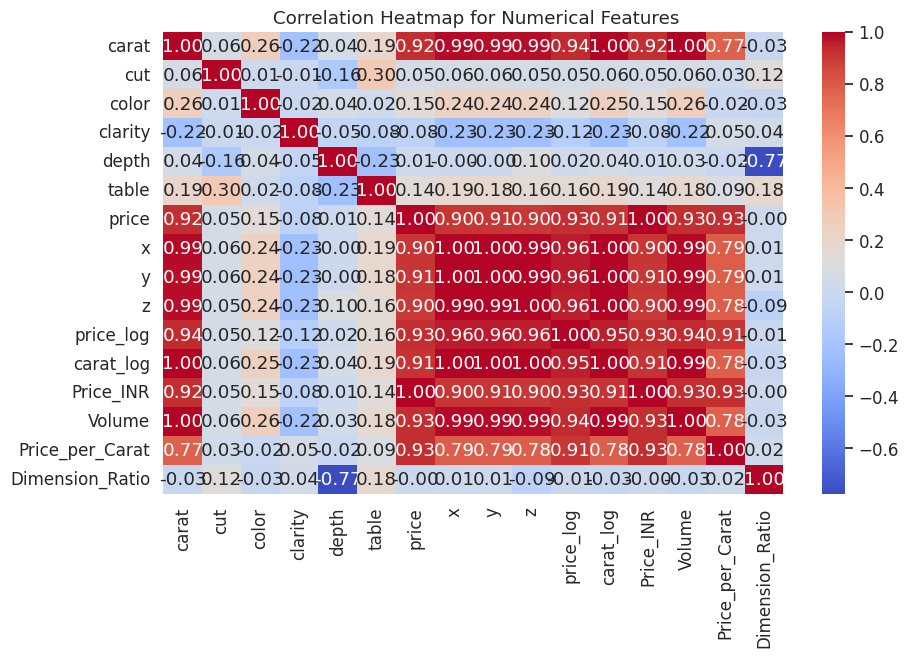

Highly correlated features (|r| > 0.8): ['price', 'x', 'y', 'z', 'price_log', 'carat_log', 'Price_INR', 'Volume', 'Price_per_Carat']
Recommendation: Consider dropping one of these if redundant.



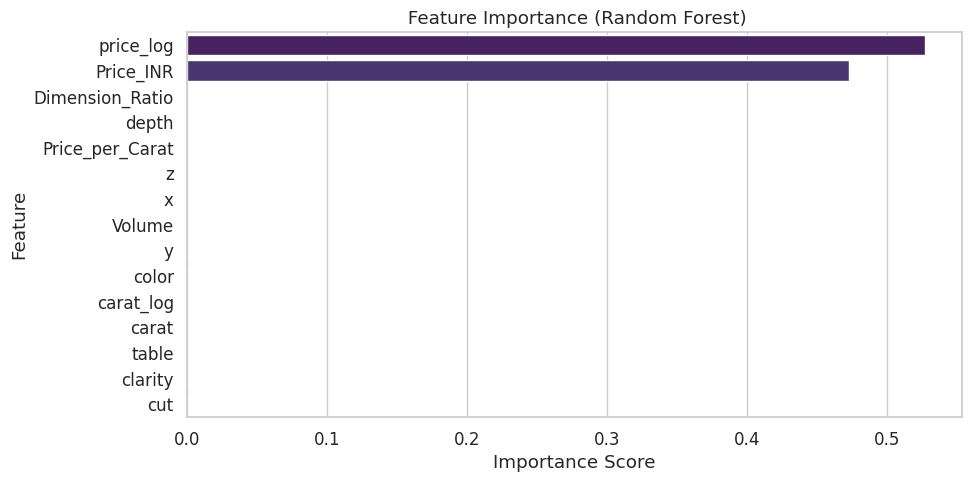

Top 10 Important Features:
 price_log          5.273466e-01
Price_INR          4.726534e-01
Dimension_Ratio    3.310350e-09
depth              3.056887e-09
Price_per_Carat    2.951560e-09
z                  2.808593e-09
x                  2.779222e-09
Volume             2.734486e-09
y                  2.704396e-09
color              2.639866e-09
dtype: float64 

Selected Features (via RFE): ['x', 'y', 'z', 'price_log', 'Price_INR', 'Volume', 'Price_per_Carat', 'Dimension_Ratio']

Final Features to keep for modeling: ['x', 'y', 'z', 'price_log', 'Price_INR', 'Volume', 'Price_per_Carat', 'Dimension_Ratio']


In [ ]:
# Correlation Matrix Analysis

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(" Correlation Heatmap for Numerical Features")
plt.show()

# Identify highly correlated features (|r| > 0.8)
corr_matrix = data.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Highly correlated features (|r| > 0.8):", high_corr)
print("Recommendation: Consider dropping one of these if redundant.\n")


# Feature Importance (Random Forest)

X = data.drop(columns=['price'])
y = data['price']

# Use only numeric columns
X_num = X.select_dtypes(include=['int64', 'float64'])

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_num, y)

# Get feature importance scores
importances = pd.Series(model.feature_importances_, index=X_num.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title(" Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("Top 10 Important Features:\n", importances.head(10), "\n")


# Recursive Feature Elimination (Optional)

rfe = RFE(model, n_features_to_select=8)
fit = rfe.fit(X_num, y)

selected_features = X_num.columns[fit.support_]
print("Selected Features (via RFE):", selected_features.tolist())

# Final feature set suggestion
final_features = list(selected_features)
print("\nFinal Features to keep for modeling:", final_features)


 Regression Model Performance Comparison:
               Model         MAE           MSE         RMSE        R2
2      Random Forest    0.179523  1.867994e-01     0.432203  1.000000
1      Decision Tree    0.235864  5.598277e-01     0.748216  1.000000
0  Linear Regression  114.679093  4.051775e+04   201.290214  0.993952
3      KNN Regressor  143.537620  5.480029e+04   234.094626  0.991820
4                SVR  629.694192  1.773745e+06  1331.820356  0.735230


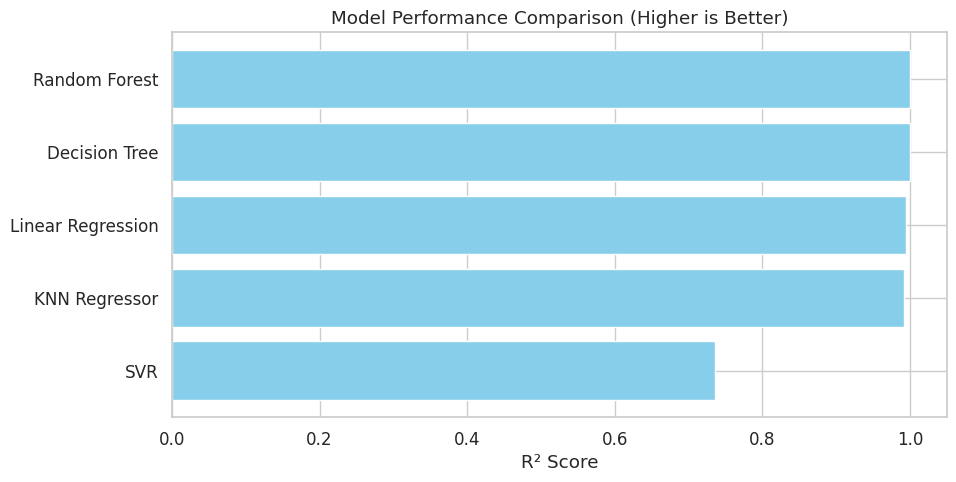

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ML Regression Models for Price Prediction

# 1Data Preparation

# Encode categorical features
categorical_cols = ['cut', 'color', 'clarity', 'Carat_Category']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Define feature matrix and target
X = data.drop(columns=['price', 'Price_INR'])
y = data['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Initialize Models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf')
}


# 3️⃣ Train and Evaluate Models

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2", ascending=False)

print("\n Regression Model Performance Comparison:")
print(results_df)


# Visualization

plt.figure(figsize=(10, 5))
plt.barh(results_df['Model'], results_df['R2'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison (Higher is Better)')
plt.gca().invert_yaxis()
plt.show()


#  Save the Best Model

best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

import pickle
from google.colab import files

# Save model to Colab temp folder
with open('/content/best_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Download it to your Mac
files.download('/content/best_regression_model.pkl')

In [ ]:
import joblib
joblib.dump(best_model, 'best_regression_model.pkl')

print(f"\n Best Model: {best_model_name}")
print("Model saved as 'best_regression_model.pkl'")

In [ ]:
import os
os.listdir('/content')

['.config',
 'diatarget.pkl',
 'ann_price_prediction_model.h5',
 'diamonds (2).csv',
 'diamond_price_ann_model.h5',
 'best_regression_model.pkl',
 'scaler.pkl',
 'best_kmeans_model.pkl',
 'sample_data']

Epoch 1/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6296424.0000 - mae: 1519.8030 - val_loss: 111834.2969 - val_mae: 217.1581
Epoch 2/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 184561.9531 - mae: 304.0469 - val_loss: 69484.4844 - val_mae: 157.6185
Epoch 3/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 160438.1406 - mae: 272.3954 - val_loss: 44548.6172 - val_mae: 126.5592
Epoch 4/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 158842.3281 - mae: 262.9086 - val_loss: 34326.0430 - val_mae: 111.1100
Epoch 5/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 148854.7969 - mae: 250.8428 - val_loss: 28260.9062 - val_mae: 99.9764
Epoch 6/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 142172.0625 - mae: 246.4273 - val_loss: 27704.0273 - val_mae: 97.6515
Epoch 7/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 128945.2812 - mae: 234.0685 - val_loss: 20848.5371 - val_mae: 87.8312
Epoch 8/100
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 131448.9375 - m

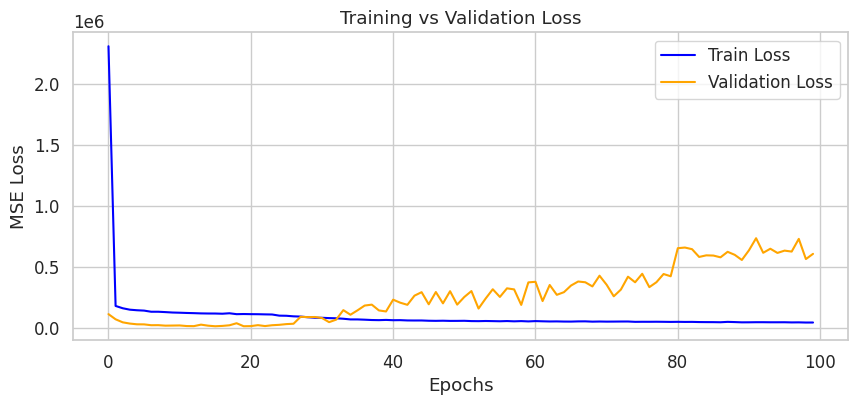


 ANN model saved as 'diamond_price_ann_model.h5'


In [ ]:

# ANN Model for Diamond Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
#  Build ANN Model

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (regression output)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


# Train the Model

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the Model

y_pred = model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nANN Regression Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


#  Visualization

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


# 6️⃣ Save the Model
model.save("diamond_price_ann_model.h5")
print("\n ANN model saved as 'diamond_price_ann_model.h5'")

In [ ]:
import joblib

# Save ANN model
model.save('ann_price_prediction_model.h5')

# Save the scaler (if used)
joblib.dump(scaler, 'scaler.pkl')

print("ANN and scaler saved successfully!")

ANN and scaler saved successfully!


In [ ]:


#Data Preparation Clustering Implementation

# Select only relevant features for clustering
features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']
X = data[features].copy()

# Encode categorical features
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

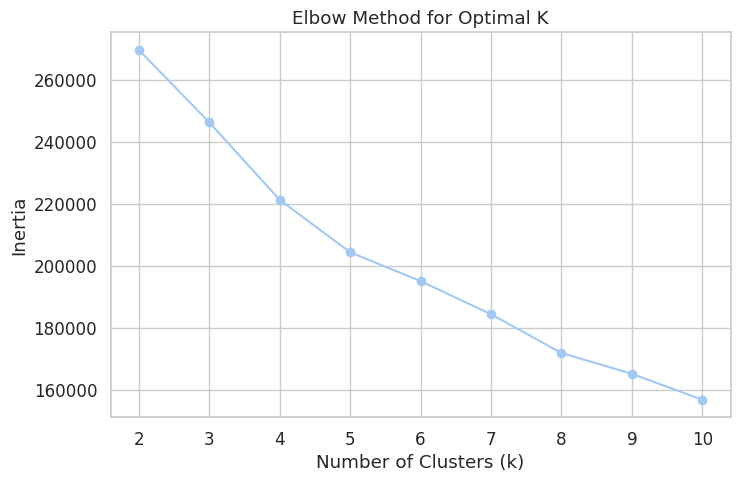

In [ ]:
#Elbow Method for Optimal K (K-Means)

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
#Silhouette Score Check

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'K={k}: Silhouette Score = {score:.3f}')

K=2: Silhouette Score = 0.307
K=3: Silhouette Score = 0.168
K=4: Silhouette Score = 0.165
K=5: Silhouette Score = 0.172
K=6: Silhouette Score = 0.153
K=7: Silhouette Score = 0.168


In [ ]:
#Final K-Means Model
# Choose optimal K based on elbow/silhouette
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

print("✅ Clustering complete!")

✅ Clustering complete!


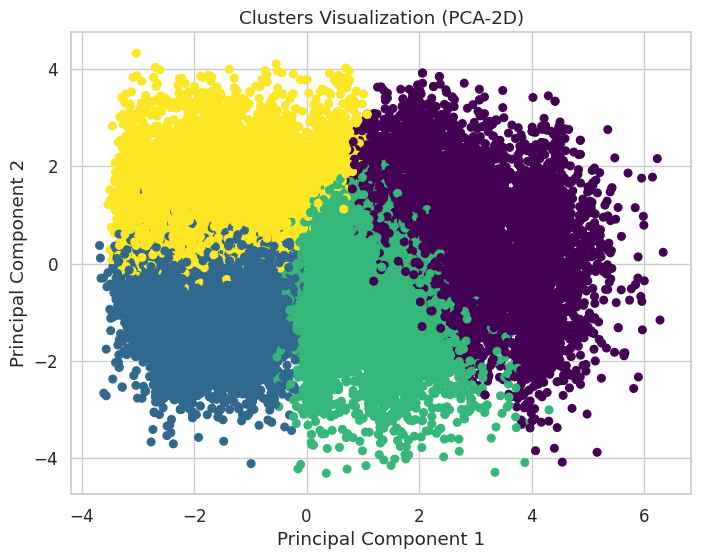

In [ ]:
#PCA Visualization (2D Plot)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data['cluster'], cmap='viridis', s=30)
plt.title('Clusters Visualization (PCA-2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Cluster Profiling & Naming
#Add key numeric columns back for analysis
cluster_profile = data.groupby('cluster')[['carat', 'price', 'cut']].agg({
    'carat': 'mean',
    'price': 'mean',
    'cut': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

# Assign descriptive names based on cluster statistics
def name_cluster(row):
    if row['price'] > 10000 and row['carat'] > 1.5:
        return 'Premium Heavy Diamonds'
    elif row['price'] < 2000 and row['carat'] < 0.5:
        return 'Affordable Small Diamonds'
    else:
        return 'Mid-range Balanced Diamonds'

cluster_profile['Cluster_Name'] = cluster_profile.apply(name_cluster, axis=1)

print(cluster_profile)

   cluster     carat        price  cut                 Cluster_Name
0        0  1.203300  6292.346209    3  Mid-range Balanced Diamonds
1        1  0.401131  1088.801429    2    Affordable Small Diamonds
2        2  0.877722  4191.634315    2  Mid-range Balanced Diamonds
3        3  0.417218  1116.128785    3    Affordable Small Diamonds


In [ ]:
#Save Best Model for Streamlit
import pickle

with open('best_kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("✅ Best KMeans model saved as best_kmeans_model.pkl")

✅ Best KMeans model saved as best_kmeans_model.pkl
